<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_OB_Week1_ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter4. 모델 훈련**

1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구하기
2. 경사 하강법(반복적인 최적화 방식) 사용하여 모델 파라미터 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킴

## **4.1 선형 회귀**

- RMSE: 회귀에 가장 많이 사용되는 성능 측정 지표
- 선형 회귀 모델 훈련 -> RMSE 최소화하는 theta 찾기

### **4.1.1 정규방정식**

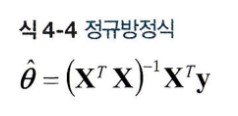

- 비용 함수를 최소화하는 theta값을 찾기 위한 해석적인 방법

In [ ]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# dot() 메서드 -> 행렬 곱셈

In [ ]:
theta_best

array([[3.65123883],
       [3.28490155]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0=1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.65123883],
       [10.22104194]])

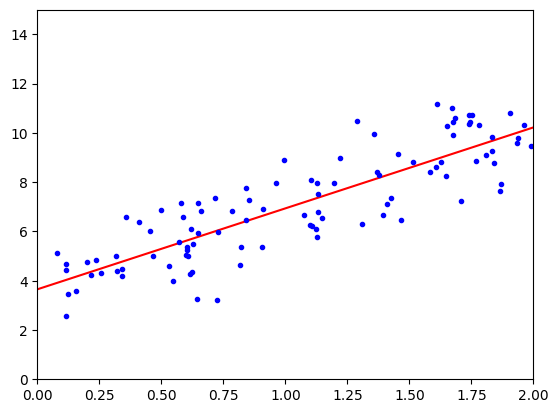

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
# 사이킷런에서 선형 회귀 수행

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.65123883]), array([[3.28490155]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.65123883],
       [10.22104194]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함.

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.65123883],
       [3.28490155]])

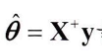

- X+는 X의 유사역행렬임
- np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있음

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.65123883],
       [3.28490155]])

**< 유사역행렬 >**
- 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨
- SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈으로 분해함

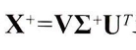

## **4.2 경사 하강법**
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 중요한 파라미터: 학습률 하이퍼파라미터
- 학습률 너무 작으면 반복 많이 진행해야 하므로 시간이 오래 걸림
- 학습률 너무 크면 발산 가능성
- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수(convex function)임

**경사 하강법을 사용할 때 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함. 그렇지 않으면 수렴하는 데 훨씬 오래 걸림.**

### **4.2.1 배치 경사 하강법**

- **편도함수(partial derivative)**: 경사 하강법을 구현하기 위해 각 모델 파라미터에 대해 비용 함수의 그레디언트를 계산.

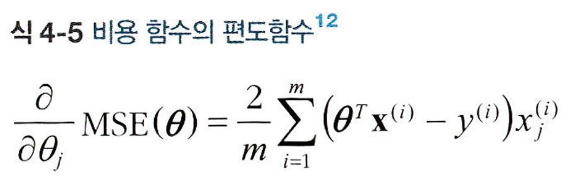

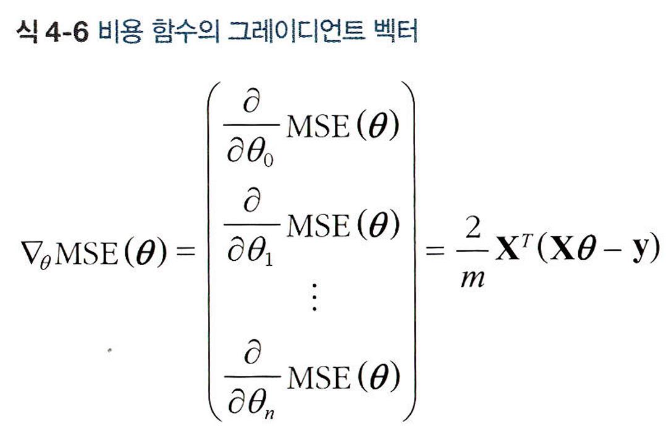

이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산함. 그래서 이 알고리즘을 **배치 경사 하강법**이라 함. 즉, 매 스텝에서 훈련 데이터 전체를 사용함. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리지만 특성 수에 민감하지 않음. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 빠름

In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

# 정규방정식으로 찾은 것과 정확히 같음 -> 경사하강법 잘 작동함

array([[3.65123883],
       [3.28490155]])

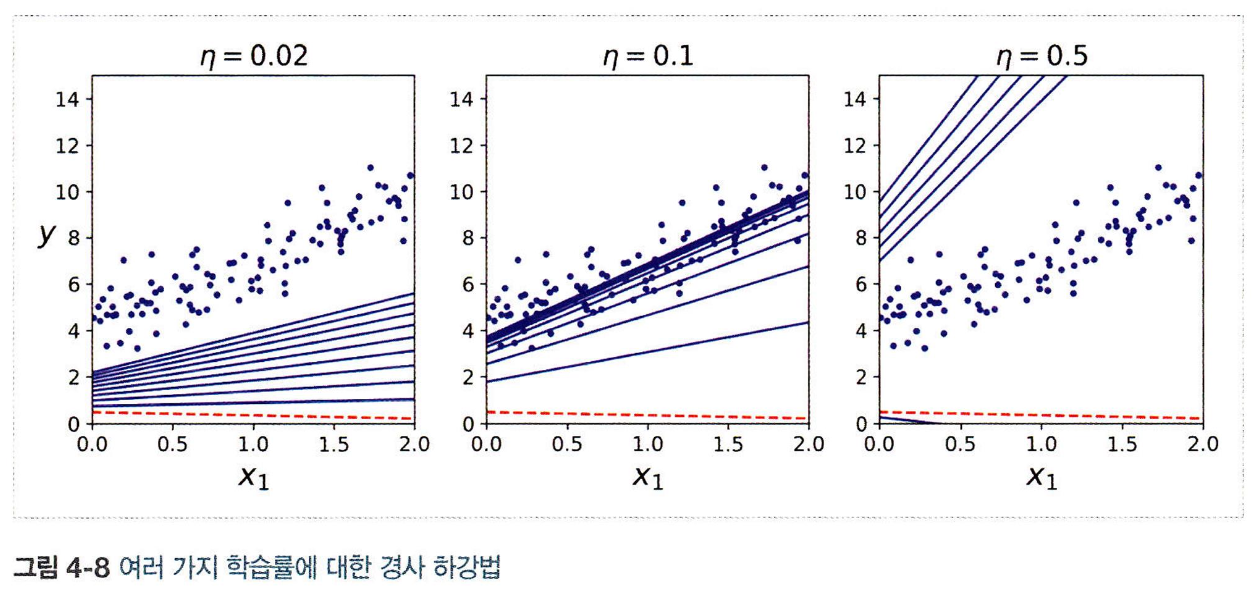

- 왼쪽: 학습률이 너무 낮음. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것
- 가운데: 학습률 적당. 반복 몇 번 만에 이미 최적점 수렴
- 오른쪽: 학습률 너무 높음. 최적점에서 점점 더 멀어져 발산.

적절한 학습률 찾으려면 **그리드 탐색** 사용. 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델 막기 위해 **반복 횟수** 제한해야 함.

반복 횟수 지정은 처음에 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하면 됨.

### **4.2.2 확률적 경사 하강법**

- 확률적 경사 하강법: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함
- 데이터 적어지기 때문에 알고리즘이 빨라짐
- 확률적이기 때문에 배치 경사 하강법보다 불안정함
- 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음
- 무작위성은 지역 최솟값에서 탈출시켜주지만 전역 최솟값에 다다르지 못하게 함. 해결하는 법은 학습률을 점진적으로 감소시키는 것.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.64367758],
       [3.27593345]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.60595182]), array([3.23440353]))

### 4.2.3 미니배치 경사 하강법

- 미니배치 경사 하강법: 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트 계산함.
- 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상


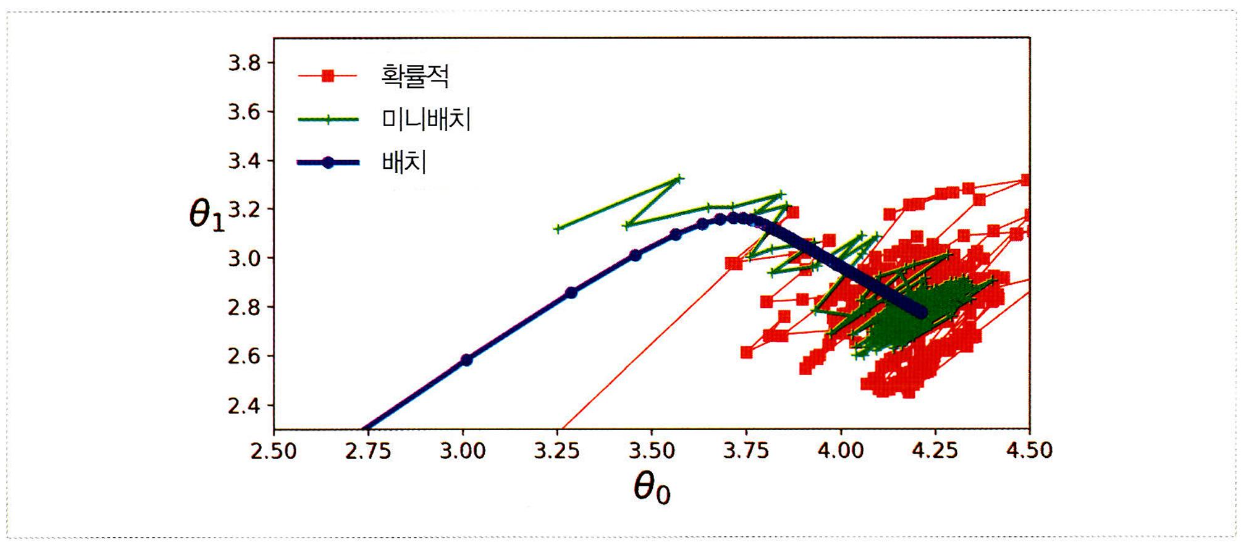

- 모두 최솟값 근처에 도달
- 배치 경사 하강법의 경로 -> 실제로 최솟값에서 멈춤
- 확률적 경사 하강법 & 미니배치 경사 하강법은 근처에서 맴돌고 있음
- 하지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄 사용하면 최솟값에 도달함


## **4.3 다항 회귀**

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

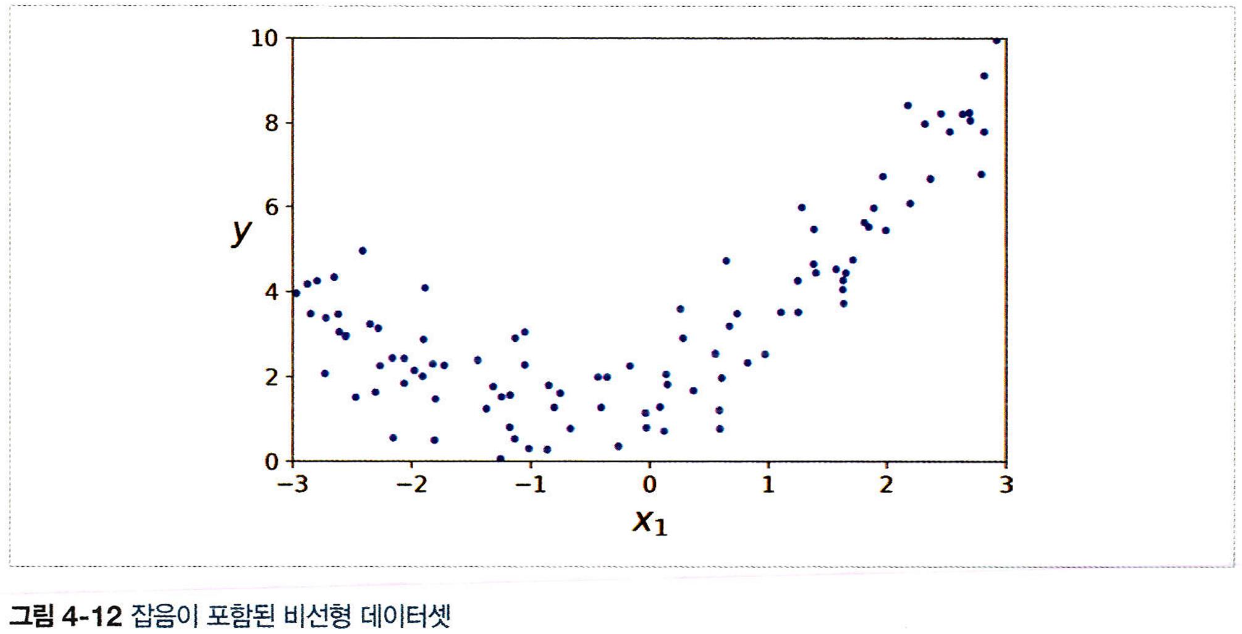

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.65956836]), array([2.65956836, 7.07330388]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.84433202]), array([[0.94805896, 0.50852462]]))

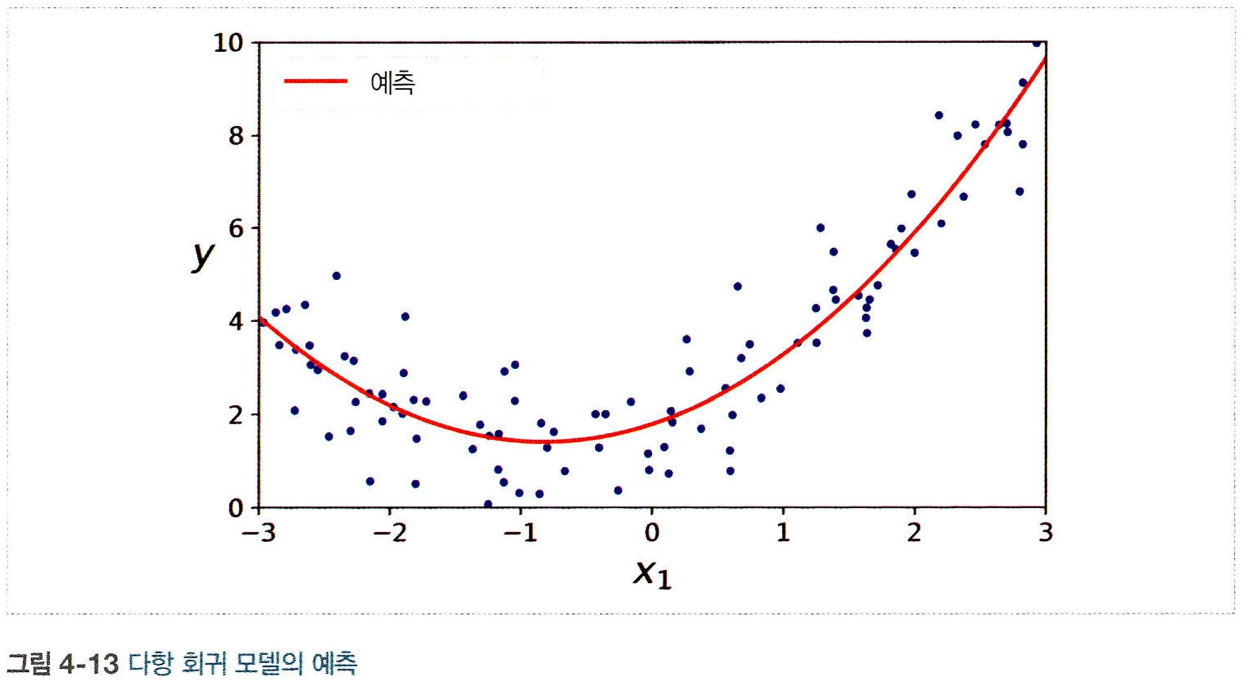

## **4.4 학습 곡선**



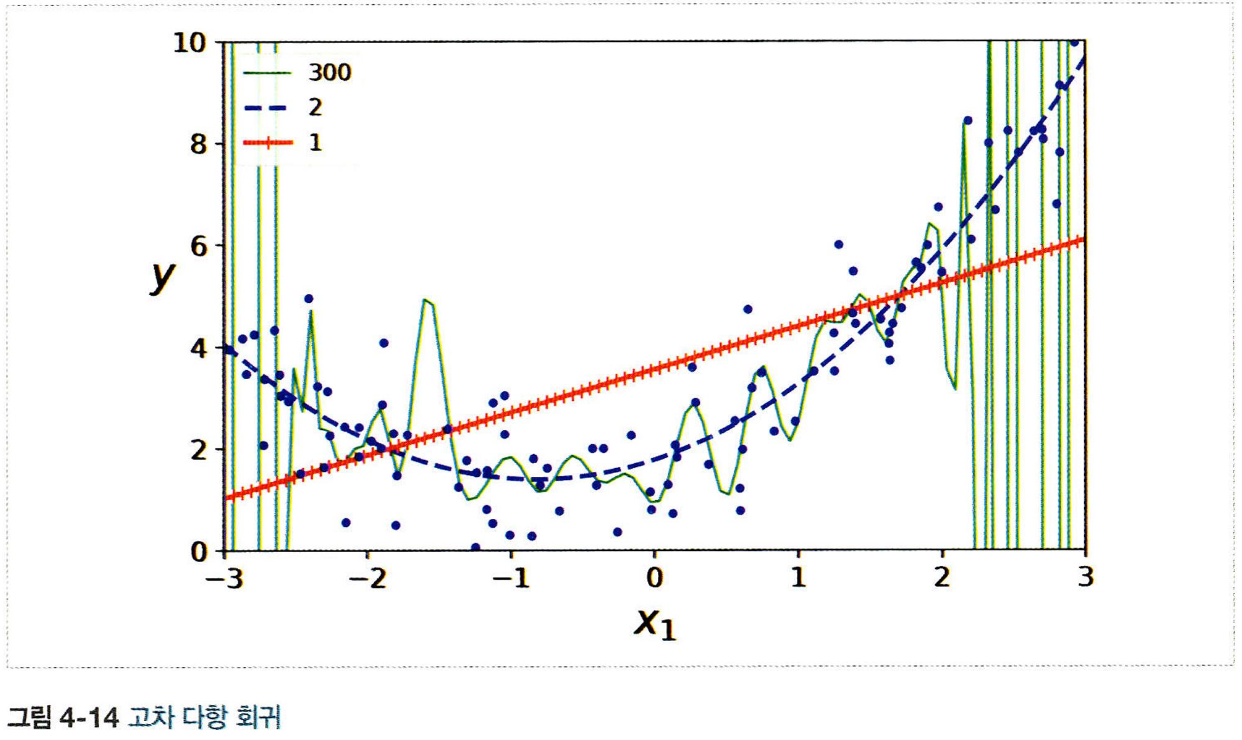

이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합됨. 반면 선형 모델은 과소적합임. 가장 일반화가 잘된 모델은 2차 다항 회귀임.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='검증 세트')

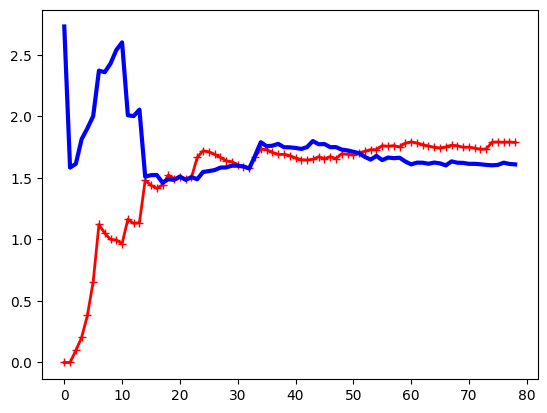

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

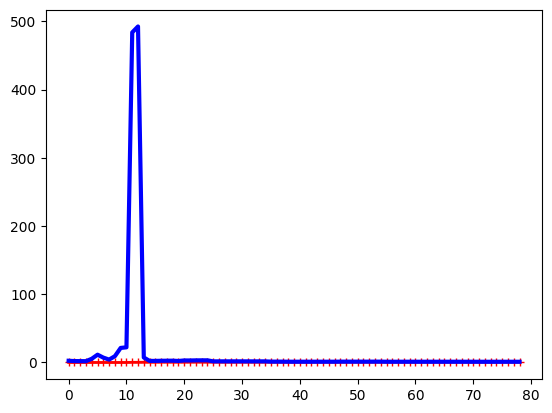

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)